<a href="https://colab.research.google.com/github/shareefat/machine-learning-/blob/main/ML_Tennis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np


In [63]:
df=pd.read_csv('tennis.csv')
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [65]:
df.shape

(14, 5)

In [66]:
df.isnull().sum()

,0
outlook,0
temp,0
humidity,0
windy,0
play,0


In [67]:
!pip install category_encoders

In [68]:
import category_encoders as ce
encoder=ce.OneHotEncoder(cols=['outlook','temp','humidity'])
df=encoder.fit_transform(df)
df

,outlook_1,outlook_2,outlook_3,temp_1,temp_2,temp_3,humidity_1,humidity_2,windy,play
0,1,0,0,1,0,0,1,0,False,no
1,1,0,0,1,0,0,1,0,True,no
2,0,1,0,1,0,0,1,0,False,yes
3,0,0,1,0,1,0,1,0,False,yes
4,0,0,1,0,0,1,0,1,False,yes
5,0,0,1,0,0,1,0,1,True,no
6,0,1,0,0,0,1,0,1,True,yes
7,1,0,0,0,1,0,1,0,False,no
8,1,0,0,0,0,1,0,1,False,yes
9,0,0,1,0,1,0,0,1,False,yes


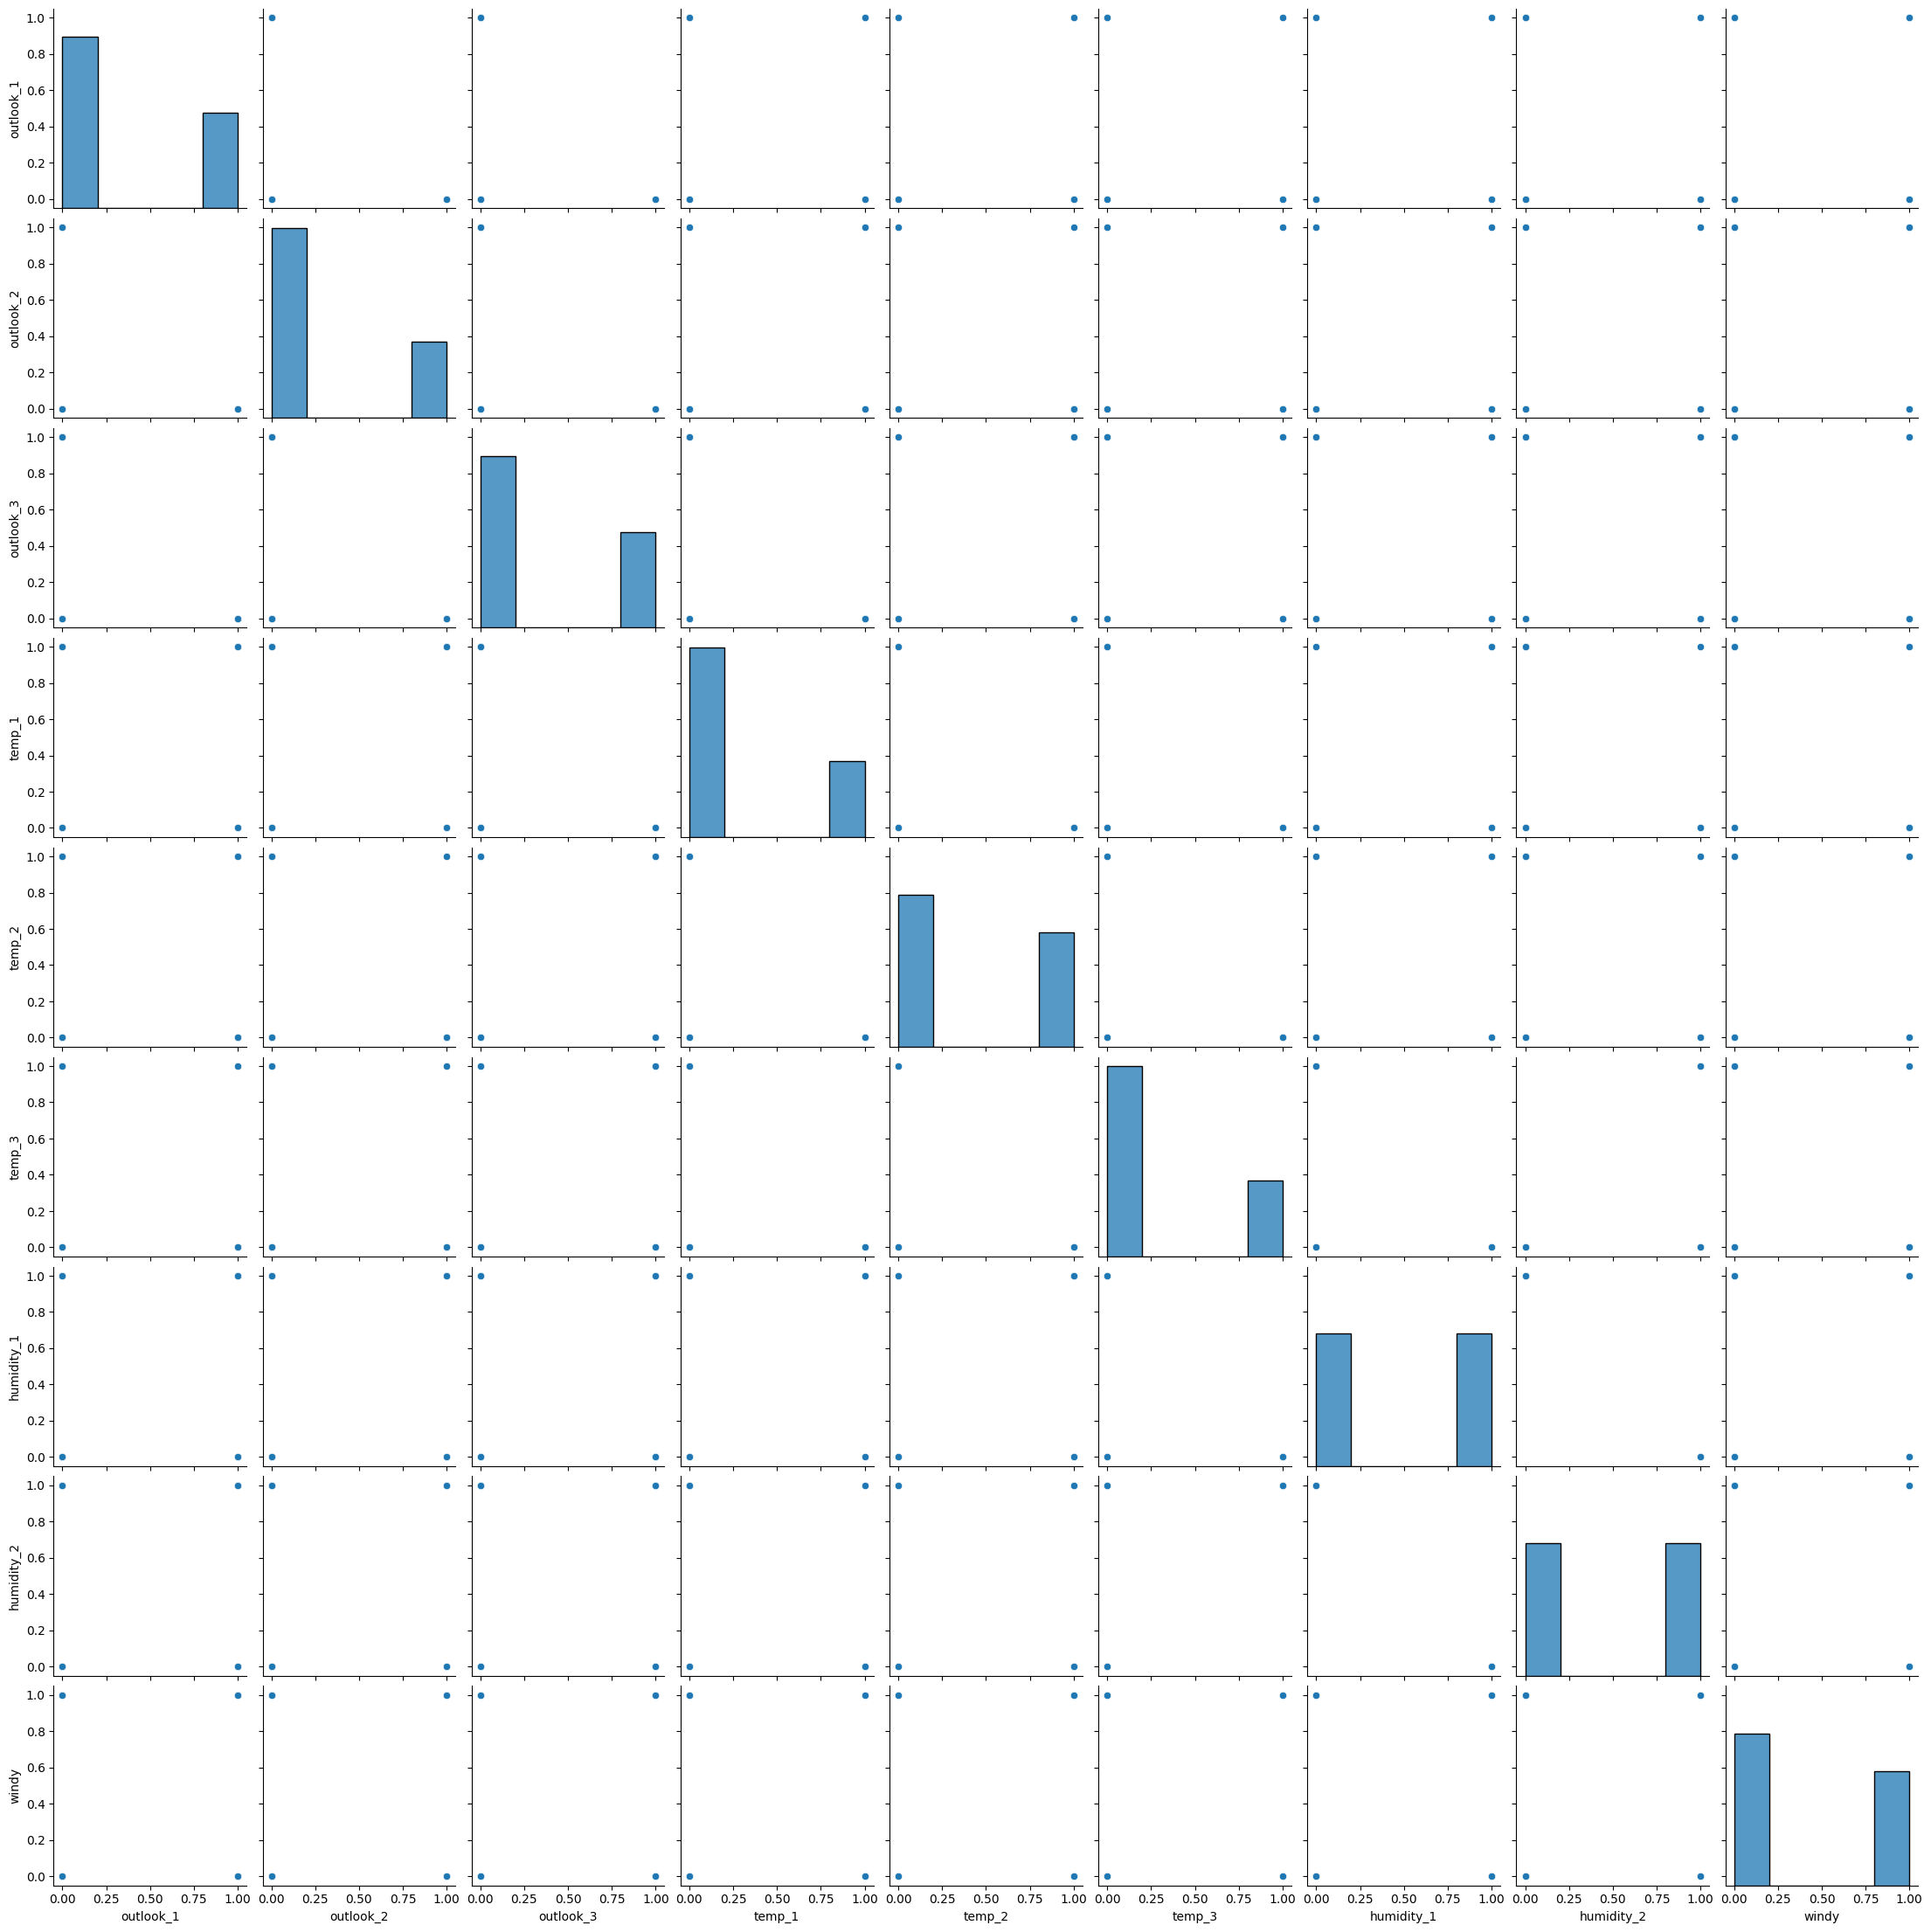

In [69]:
import seaborn as sns
sns.pairplot(df)

In [70]:
x=df.drop('play',axis=1)
y=df['play']

In [71]:
y

,play
0,no
1,no
2,yes
3,yes
4,yes
5,no
6,yes
7,no
8,yes
9,yes


In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [73]:
x_train.shape

(11, 9)

In [74]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [75]:
y_pred=model.predict(x_test)
y_pred

array(['no', 'no', 'yes'], dtype='<U3')

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6666666666666666

In [80]:
model.predict([[1,0,0,1,0,0,1,0,False]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['no'], dtype='<U3')

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1, 0],
       [1, 1]])

In [82]:
model.predict([[1,1,1,1,1,1,1,1,True]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['yes'], dtype='<U3')

In [83]:
model.predict([[0,0,0,0,0,0,0,0,False]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['no'], dtype='<U3')

In [84]:
model.predict([[0,0,0,0,0,0,0,0,True]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['no'], dtype='<U3')